<a href="https://colab.research.google.com/github/Jyotishmoy12/MachineLearning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification tasks, but it can also be adapted for regression and outlier detection.

### How SVM Works:
1. **Linear Classifier:**
   - In the simplest form, SVM is a linear classifier that attempts to find the best decision boundary (hyperplane) that separates different classes in a dataset. The goal is to find a hyperplane that maximizes the margin between the closest points (support vectors) of the different classes.
   - The margin is the distance between the hyperplane and the nearest data point from either class. SVM seeks to maximize this margin to ensure that the classes are well separated.

2. **Support Vectors:**
   - The data points that lie closest to the decision boundary are called support vectors. These points are critical because they determine the position and orientation of the hyperplane. Even if other points are removed, as long as the support vectors remain, the decision boundary does not change.

3. **Non-linear Classification:**
   - When data is not linearly separable (i.e., a straight line or hyperplane can't separate the classes), SVM uses a technique called the **kernel trick**. The kernel trick involves mapping the data into a higher-dimensional space where a linear separator (hyperplane) can be found. Common kernels include polynomial, radial basis function (RBF), and sigmoid.

4. **Kernels:**
   - **Linear Kernel:** Used for linearly separable data.
   - **Polynomial Kernel:** Maps data into a higher polynomial space.
   - **RBF (Radial Basis Function) Kernel:** Maps data into an infinite-dimensional space, useful for complex decision boundaries.

5. **Soft Margin:**
   - SVMs can be modified to handle noisy data or overlapping classes by introducing a "soft margin" parameter. This allows some data points to be within the margin or even on the wrong side of the hyperplane, balancing between maximizing the margin and minimizing classification errors.

### Applications of SVM:
- **Text Classification:** Spam detection, sentiment analysis.
- **Image Classification:** Identifying objects, face detection.
- **Bioinformatics:** Protein classification, gene classification.
- **Finance:** Risk management, anomaly detection.

### Advantages of SVM:
- **Effective in high-dimensional spaces:** SVM performs well when the number of features is greater than the number of samples.
- **Versatile:** Can be used for both linear and non-linear classification with appropriate kernel choice.
- **Robust to overfitting:** Especially in high-dimensional space.

### Disadvantages of SVM:
- **Memory-intensive:** Requires more memory, especially for large datasets.
- **Sensitive to parameter selection:** Performance can be sensitive to the choice of the kernel and regularization parameters.
- **Not easily interpretable:** The decision function is not as straightforward to interpret as in simpler models like logistic regression.

In summary, SVM is a powerful and versatile machine learning algorithm used for classification tasks, especially in cases where the data is high-dimensional and potentially non-linearly separable.

In [1]:
import numpy as np
import pandas as pd
from sklearn import svm  #support vector machine
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)


In [4]:
recipes=pd.read_csv('Cupcakes vs Muffins.csv')
recipes.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


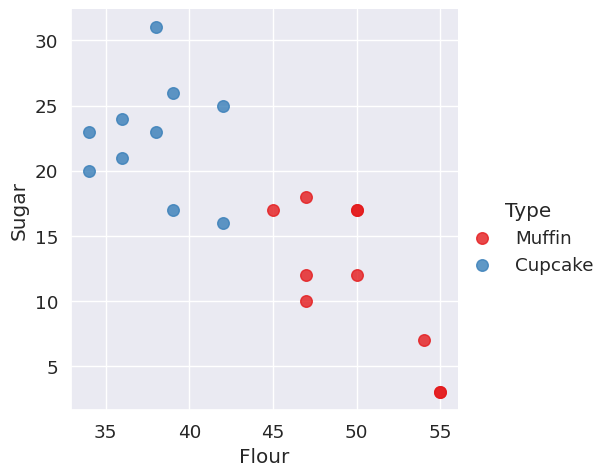

In [7]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})


In [12]:
# This line creates a new NumPy array called 'type_label' where each element is
# determined by the condition recipes['Type'] == 'Muffin'.
# If the 'Type' in the 'recipes' DataFrame is 'Muffin', the corresponding value in 'type_label'
# will be 0; otherwise, it will be 1.
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1)

# This line extracts the column names from the 'recipes' DataFrame, excluding the first column ('Type').
# The result is a list of the column names, which represent the features used in the analysis.
recipe_features = recipes.columns.values[1:].tolist()

# This line simply outputs the list of feature names to verify which features were extracted.
recipe_features

ingredients=recipes[["Flour", "Sugar"]].values
ingredients


array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]])

In [15]:
# This line creates an instance of the Support Vector Machine (SVM) model
# with a linear kernel. The 'linear' kernel means that the SVM will try to find
# a linear decision boundary to separate the data into different classes.
model = svm.SVC(kernel='linear')

# This line trains (or fits) the SVM model using the provided 'ingredients'
# as the input features and 'type_label' as the target labels.
# 'ingredients' is expected to be a 2D array or DataFrame where each row
# represents a recipe and each column represents a feature (e.g., amounts of flour, sugar, etc.).
# 'type_label' is the binary array where each element indicates the type of recipe (e.g., Muffin = 0, others = 1).
model.fit(ingredients, type_label)



SVC(kernel='linear')

In [20]:
# The 'coef_' attribute of the trained SVM model gives the coefficients of the
# features in the decision function. Since we're using a linear kernel,
# 'model.coef_' returns a single array of coefficients (the normal vector to the hyperplane).
# We're taking the first (and only) element of 'model.coef_' which is an array of weights.
w = model.coef_[0]

# The slope 'a' of the separating hyperplane is calculated as the negative ratio
# of the coefficients. This comes from the equation of the hyperplane: w[0]*x + w[1]*y + b = 0,
# which can be rearranged to y = -w[0]/w[1] * x - b/w[1].
a = -w[0] / w[1]

# 'xx' is an array of x-values ranging from 30 to 60, which is used to plot
# the decision boundary (the separating hyperplane). 'np.linspace' generates
# a set of evenly spaced values over the specified range.
xx = np.linspace(30, 60)

# 'yy' computes the corresponding y-values for the hyperplane equation using the slope 'a'
# and the intercept term. 'model.intercept_' gives the intercept of the hyperplane (b in the equation),
# and we divide it by 'w[1]' to adjust the intercept for plotting.
yy = a * xx - (model.intercept_[0]) / w[1]


b=model.support_vectors_[0]
yy_down=a*xx+(b[1]-a*b[0])
b=model.support_vectors_[-1]
yy_up=a*xx+(b[1]-a*b[0])


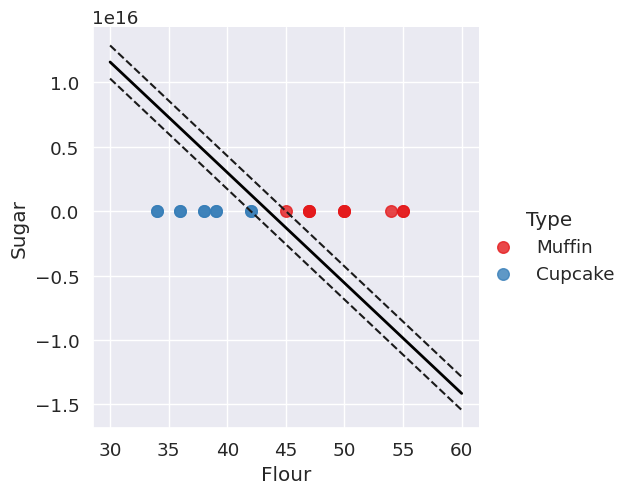

In [24]:
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [28]:
#create a function to predict muffin or cupcake
def muffin_or_cupcake(flour,sugar):
    if model.predict([[flour,sugar]])==0:
        print("muffin")
    else:
        print("cupcake")
muffin_or_cupcake(50,20)

muffin


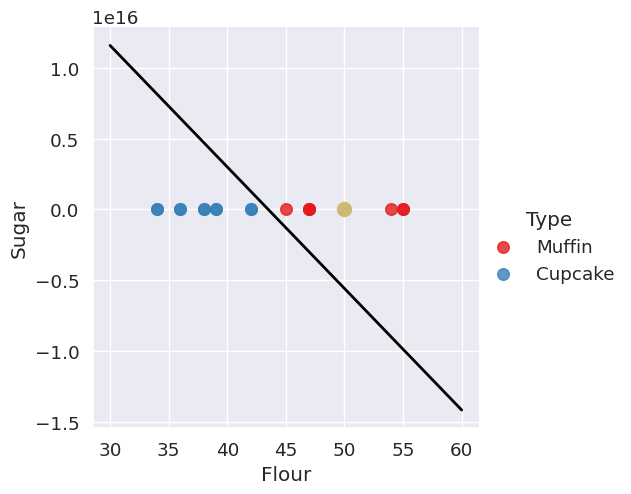

In [29]:
#lets plot this at the graph
sns.lmplot(x='Flour', y='Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')

plt.plot(50, 20, "yo", markersize=10)
